# <u>Activité n°3 : Recherche textuelle

# <u>I - Objectif.</u> 

<h3>Le but de cette activité est de réaliser à l'aide d'algorithmes dédiés des recherches textuelles.<p><p>
Ces types de recherches sont très souvent nécessaire dans certaines applications telle-que:<p>

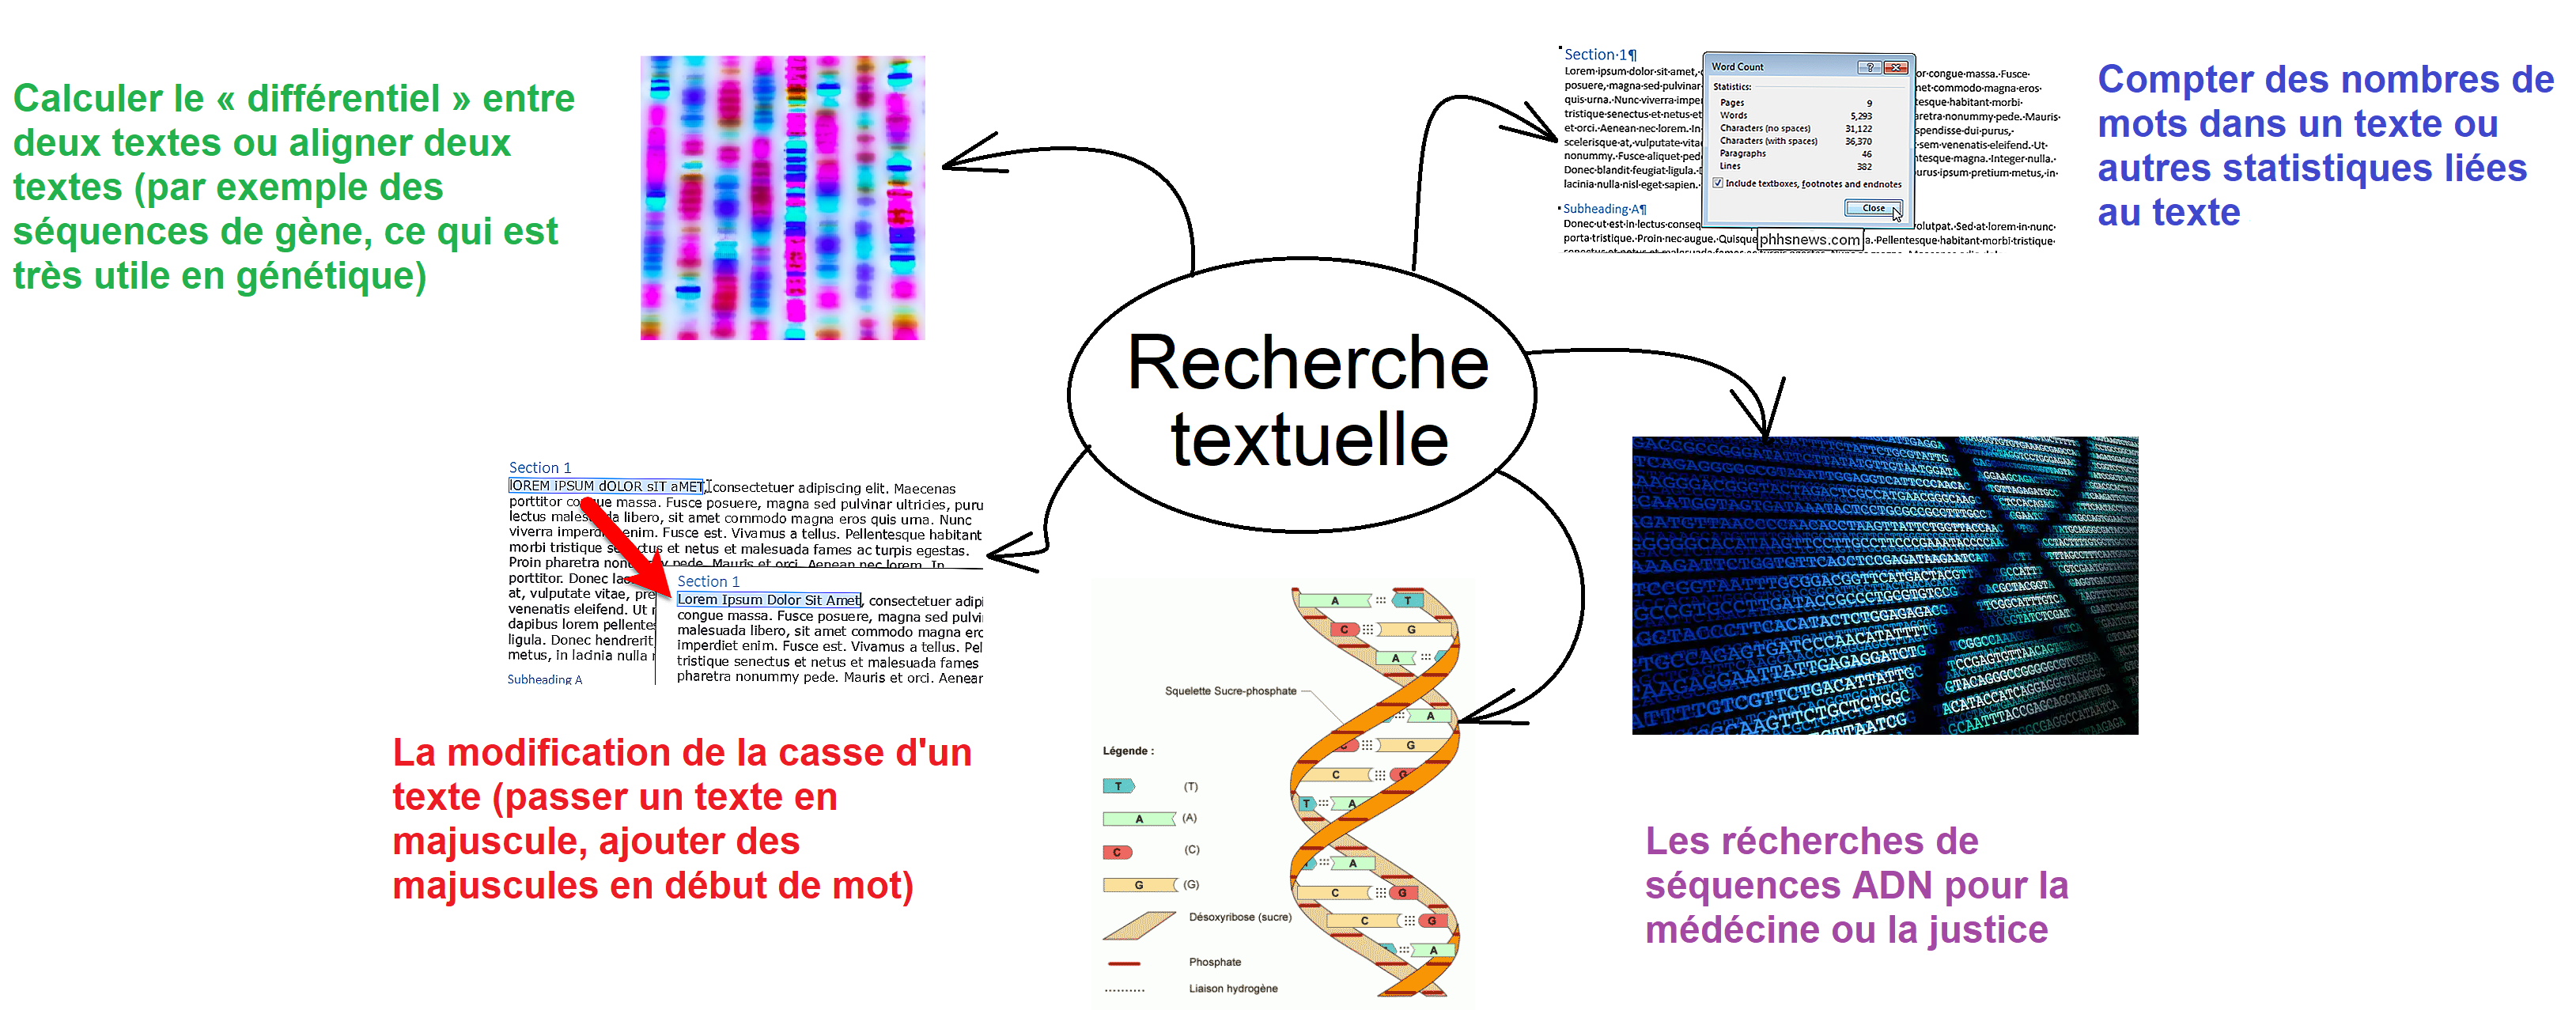

<h3><font color="red">- La modification de la casse d'un texte (passer un texte en majuscule, ajouter des majuscules en début de mot).<p> <p>
<font color="blue">- Compter des nombres de mots dans un texte ou autres statistiques liées au texte.<p>
<font color="green">- Calculer le « différentiel » entre deux textes ou aligner deux textes (par exemple des séquences de gène, ce qui est très utile en génétique).<p>
<font color="purple">- Les récherches de séquences ADN pour la médécine ou la justice.

<h1><center><font color="red">Votre objectif durant cette activité sera donc d'implémenter plusieurs algorithmes de recherche d'une chaîne de caractéres dans un texte.

# <u>II - Travail de recherche Textuelle.</u>

## <u>2.1 - Algorithme "naîf" ou "force brute" de recherche de motif.</u> 

<h3>Recherche d'un motif dans un texte :<p><p>
La recherche de motif consiste à trouver une ou toutes les positions où apparaît le motif dans le texte

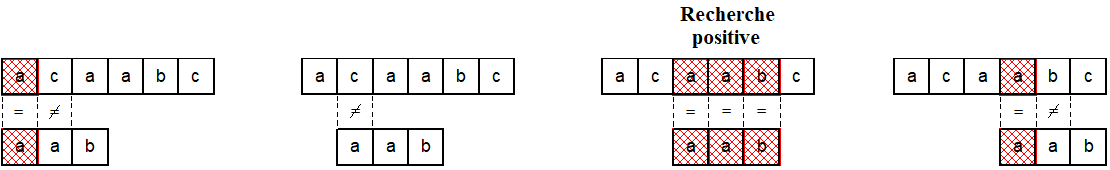

<h3><center><font color='red'>Le principe de la recherche consiste à vérifier que l'ensemble de la séquence est présente dans le texte et de retournée le cas échéant la position <font color='black'>"p"<font color='red'> du début de séquence dans le texte : 

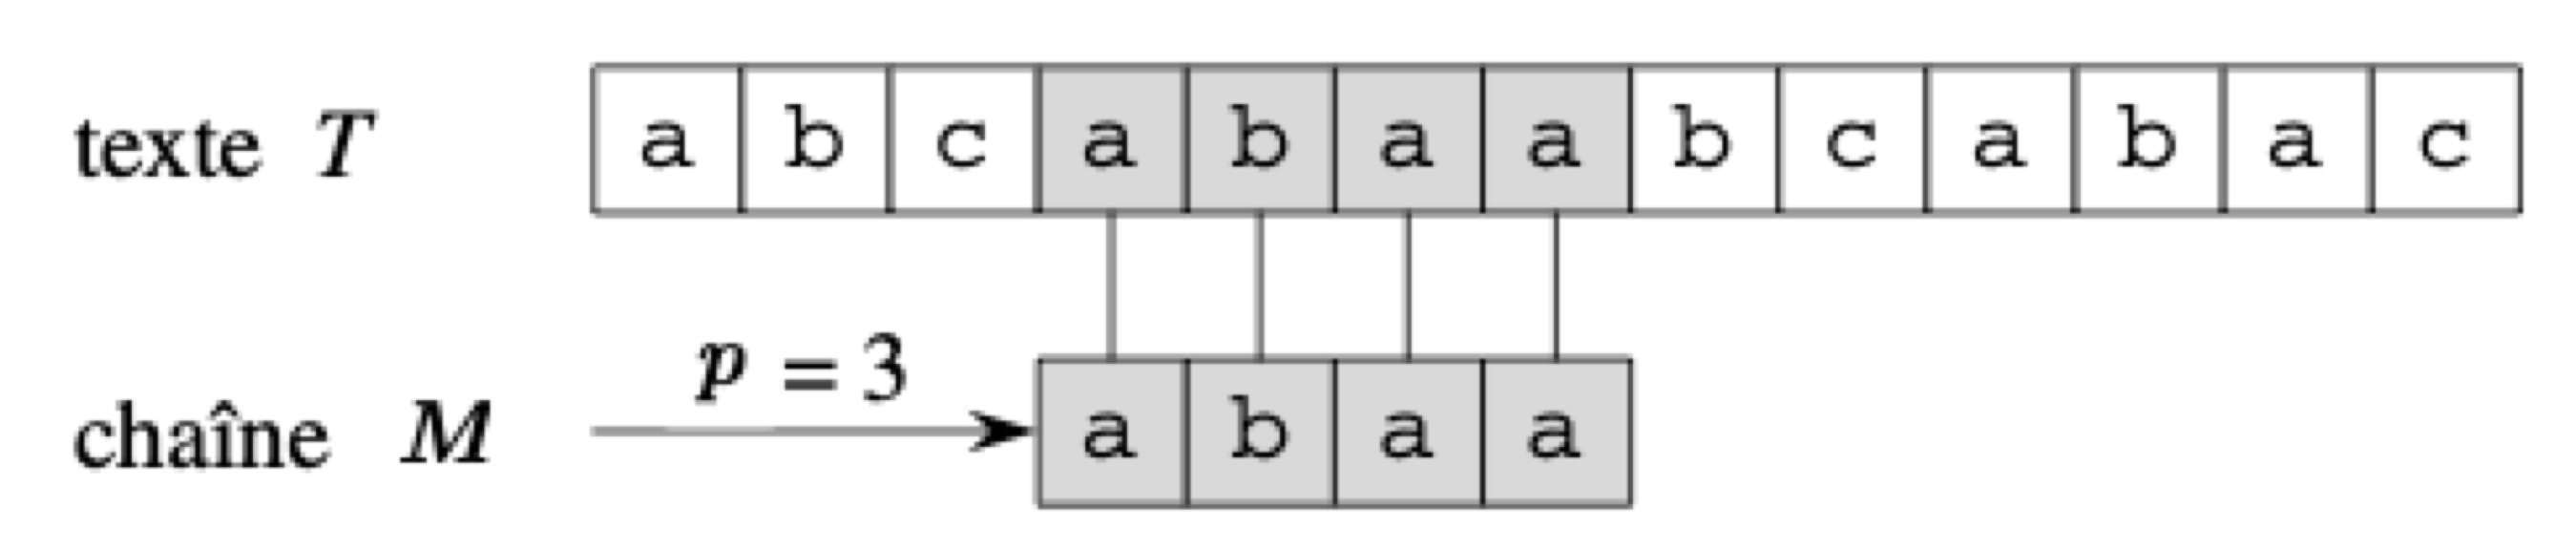

<h3><u>Exercice 1 :</u><p>
Implémenter l'algorithme de recherche naîve d'un motif dans le texte extrait de <font color="Red">"Germinal" d'Emile ZOLA</font>:<p>
la fonction devra s'arrêter dès qu'elle a trouvé une occurrence du motif dans le texte et renvoyer sa position.<p>
Si la fonction ne trouve pas de caractère, elle retournera la position -1.

<h3>Faire un essai avec les <font color="red"><u>6 mots</u><font color="black"> suivants:<p><p>
1/ <font color="red">Etienne<font color="blue"> => Réponse : position 3937<p><font color="black">
2/ <font color="red">Montsou<font color="blue"> => réponse : position 156<p><font color="black">
2/ <font color="red">pendant que son cheval<font color="blue"> => Réponse : position  3374<p><font color="black">
3/ <font color="red">Le vieux cracha noir<font color="blue"> => Réponse : poition 7033<p><font color="black">
4/ <font color="red">des pays de la houille et du fer<font color="blue"> => Réponse : poition 10488<p><font color="black">
5/ <font color="red">s'appelait la veine Guillaume<font color="blue"> => Réponse : poition 15999<p><font color="black">
6/ <font color="red">de chair humaine<font color="blue"> => Réponse : poition 21034

In [3]:
def naif1(text,data):
    """Fonction naif1()
    Entrée: 
            text: texte à analyser
            data: séquence à rechercher dans le texte
    sortie: indice de position dans le texte de la séquence ou -1 si la séquence n'a pas été retrouvée. 
    """
    # Longueur du texte et de la séquence 
    n = len(text)
    m = len(data)
    
    # Parcourir le texte
    for i in range(n - m + 1):
        # Comparer chaque caractère de la sous-chaîne
        j = 0
        while j < m and text[i + j] == data[j]:
            j += 1
        
        # Si on a trouvé toute la séquence
        if j == m:
            return i
    
    # Si la séquence n'a pas été trouvée
    return -1

# Completer la fonction naif1 afin de répondre à l'exercice 1

#*****************************************************************************************
#Portée principale
with open("germinal.txt") as fh:
    texte=fh.read()
chaine_rech=input("saisir la chaîne à rechercher:")
position=naif1(texte,chaine_rech)
print(f"La position du début de la séquence est : {position}")
if position!=-1:
    print("La séquence à cette position est : ",end='')
    for i in range(len(chaine_rech)):
        print(texte[position+i],end='')

saisir la chaîne à rechercher: Montsou


La position du début de la séquence est : 163
La séquence à cette position est : Montsou

<h3><u>Exercice 2 :</u><p>
    Modifier la fonction <u><font color="red">naif1(text,data)</u><font color="black"> en une fonction <u><font color="red">naif2(text,data)</u><font color="black"> afin qu'elle renvoie une liste [...] de toutes les positions où apparaissent le motif dans le texte.<p>
<h3>Faire un essai avec les <font color="red"><u>2 mots</u><font color="black"> suivants:<p><p>
1/ <font color="red">Etienne<font color="blue"> => Réponse : <p>positions [3937, 4332, 5125, 6725, 7669, 9433, 10585, 11690, 12861, 14496, 14862, 17041, 17349, 18502, 19616, 20019]<p><font color="black">
2/ <font color="red">gros cheval<font color="blue"> => Réponse : <p>positions [3401, 4946, 18169]

In [15]:
def naif2(text,data):
    # Longueur du texte et de la séquence 
    n = len(text)
    m = len(data)
    
    indices = []  # Liste pour stocker les indices de correspondance trouvée
    
    # Parcourir le texte
    for i in range(n - m + 1):  # Parcourir chaque position possible pour trouver la séquence
        # Comparer chaque caractère de la sous-chaîne
        match = True
        for j in range(m):
            if i + j >= n:  # S'assurer que l'indice ne dépasse pas la longueur du texte
                match = False
                break
            if text[i + j] != data[j]:  # Si un caractère ne correspond pas, arrêter la comparaison
                match = False
                break
        # Si on a trouvé toute la séquence
        if match:  # Si tous les caractères de la séquence correspondent
            print(f"Séquence trouvée à l'indice: {i}")
            indices.append(i)  # Ajouter l'indice à la liste des indices trouvés
    
    # Si la séquence n'a pas été trouvée
    if not indices:
        print("Séquence non trouvée")
    return indices  # Retourner la liste des indices (vide si aucune occurrence trouvée)
    
#*****************************************************
#Portée principale
with open("germinal.txt") as fh:
    texte=fh.read()
chaine_rech=input("saisir la chaîne à rechercher:")
position=naif2(texte,chaine_rech)
print(f"Les positions de la séquence sont :\n{position}")

saisir la chaîne à rechercher: Etienne


Séquence trouvée à l'indice: 4097
Séquence trouvée à l'indice: 4506
Séquence trouvée à l'indice: 5322
Séquence trouvée à l'indice: 6985
Séquence trouvée à l'indice: 7962
Séquence trouvée à l'indice: 9790
Séquence trouvée à l'indice: 10988
Séquence trouvée à l'indice: 12139
Séquence trouvée à l'indice: 13362
Séquence trouvée à l'indice: 15031
Séquence trouvée à l'indice: 15410
Séquence trouvée à l'indice: 17674
Séquence trouvée à l'indice: 17988
Séquence trouvée à l'indice: 19176
Séquence trouvée à l'indice: 20344
Séquence trouvée à l'indice: 20764
Les positions de la séquence sont :
[4097, 4506, 5322, 6985, 7962, 9790, 10988, 12139, 13362, 15031, 15410, 17674, 17988, 19176, 20344, 20764]


## <u>2.2 - Algorithme de Boyer-Moore-Horspool.</u> 

<h3><center>Le but de cet algorithme est d'optimiser la recherche d'une séquence dans un texte,<br>il est de fait plus efficace que l'algorithme de force brut précédent.<p><p>
   
<center>Imaginons que nous recherchons la séquence <font color="green">"comment"<font color="black"> dans la phrase : <p><p><center><font color="red">"hello ecouter moi bien les tetards comment ca va ?"</font></center>
    <p><font color="navy"><u>Remarque :</u> Le pronom démonstratif "ça" sera écrit sans la <u>cédille</u> pour des raisons pratiques dans le code.


<h2><u>Le principe de l'algorithme B.M.H. est expliqué ci-dessous :

<h3><u><font color="navy">Etape n°1 : Création de la table de saut

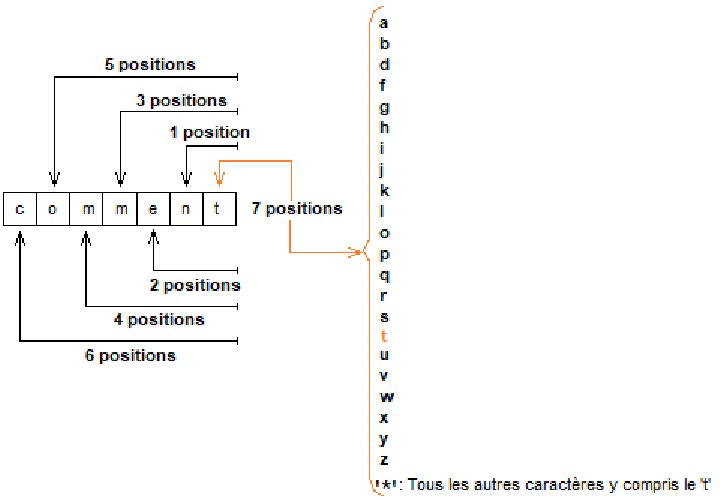

<h3>L'algorithme nécéssite initialement la création puis l'utilisation d'une <font color="red"><u>"table de saut"</u><font color="black"> calculée à l'aide de la séquence recherchée.<p><p>
en analysant le processus ci-dessus,<br>
on peut établir la table suivante de décalage des lettres sur la chaîne recherchée :<font color="red"> "comment":<font color="black"><p>
En partant de l'avant dernier caractère à droite, on compte directement les décalages des lettres,<br>
si on retrouve une lettre déjà traitée on ne la retraite pas<p><p>
D'où la table:<p><font color="green">
    'n' décalage de 1 lettre<p>
    'e' décalage de 2 lettres<p>
    'm' décalage de 3 lettres<p>
    'o' décalahe de 5 lettres<p>
    'c' décalage de 6 lettres<p>
    '*' (autres caractères y compris 't') décalage de 7 lettres<p>
<font color="black">En partant de la gauche, le décalage sera la taille de la chaine de caractères recherché moins la position de la lettre moins 1, si on retrouve une lettre déjà traitée on la retraite<p><p>
D'où la table:<p><font color="green">
    'c' décalage de 7-0-1 = 6 lettres<p>
    'o' décalage de 7-1-1 = 5 lettres<p>
    'm' décalage de 7-2-1 = 4 lettres<p>
    'm' décalage de 7-3-1 = 3 lettres (effaçant le traitement précédent!!!)<p>
    'e' décalage de 7-4-1 = 2 lettres<p>
    'n' décalage de 7-5-1 = 1 lettre<p>
    '*' (autre caractères y compris 't') décalage de 7 lettres<p>
    

<h3><u><font color="navy">Etape n°2 : Rechercher la séquence de façon optimale à l'aide de l'algorithme B.M.H.

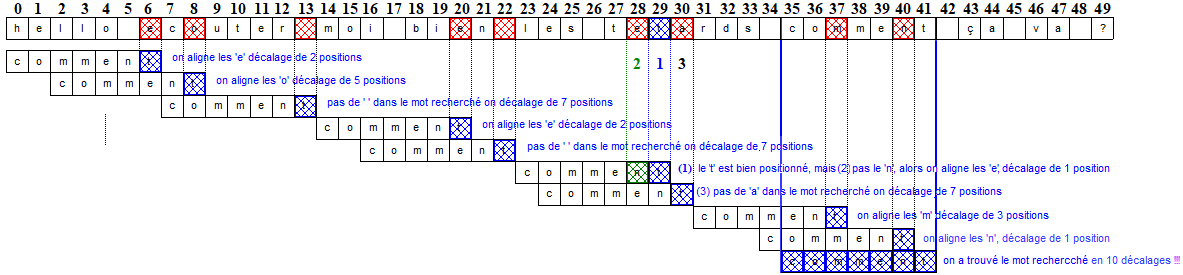

<center><u>fig.1

<h3><u>Exercice 1 :</u>

<h3>Implémenter la fonction <font color="red"><u>derniere_occurrence(motif, alphabet)</u> <font color="black"><p><p>
    <font color="green"><u>Qui prend en argument :</u><p><p>
 - Le motif à rechercher (motif)<p>
 - L'ensemble des lettres de l'alphabet (alphabet)<p><p><font color="purple">
<u>Et qui retourne :</u><p>
 - Un dictionnaire associant à chaque lettre le décalage à effectuer dans l'algorithme de<p>Boyer-Moore-Horspool (dico_saut)

<h3>Voici le dictionnaire que vous devez obtenir si le motif recherché est "comment" :

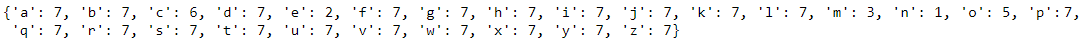

In [7]:
import string
def derniere_occurrence(motif, alphabet):
    """Fonction derniere_occurence()
    Entrée: 
            motif: chaîne de caractères recherchés
            alphabet: liste de l'alphabet en format petit caractère 
     sortie:dictionnaire associant à la clé (lettre de l'alphabet) le décalage de position correspondant à l'algorithme Boyer-Moore-Horspool 
    """

    taille_motif = len(motif)
    derniere_occ = {lettre: taille_motif for lettre in alphabet}
    
    # Remplir le dictionnaire avec la distance de la dernière occurrence des caractères du motif
    for i in range(taille_motif - 1):
        derniere_occ[motif[i]] = taille_motif - 1 - i
    
    return derniere_occ

        

    # Completer la fonction derniére_occurence() afin de répondre à l'exercice 1 BMH 

#***************************************************
# Portée principale
motif_rech="comment"
liste_alphabet=list(string.ascii_lowercase)
dico_saut=derniere_occurrence(motif_rech,liste_alphabet)
print(dico_saut)

{'a': 7, 'b': 7, 'c': 6, 'd': 7, 'e': 2, 'f': 7, 'g': 7, 'h': 7, 'i': 7, 'j': 7, 'k': 7, 'l': 7, 'm': 3, 'n': 1, 'o': 5, 'p': 7, 'q': 7, 'r': 7, 's': 7, 't': 7, 'u': 7, 'v': 7, 'w': 7, 'x': 7, 'y': 7, 'z': 7}


<h3><u>Exercice 2 :</u>

<h3>Implémenter la fonction <font color="red"><u>bmh (tab_saut, texte, motif)</u> <font color="black"><p><p>
    <font color="green"><u>Qui prend en argument :</u><p><p>
 - Le dico des décalages de saut précedement créé (tab_saut)<p>
 - Le texte à analyser (texte)<p>
 - Le motif à rechercher (motif)<p><p><font color="purple">
<u>Et qui retourne :</u><p>
 - La position de la séquence recherchée dans le texte de façon optimisée par l'algorithme de<p> Boyer-Moore-Horspool (entier)

<h3>Voici le résultat de la recherche du motif "comment" via l'algorithme de Boyer-Moore-Horspool :

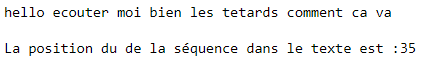

<h3><font color="red"><u>Remarque :</u> Vous pourrez remarquer sur la <u>figure 1</u> (ci-dessus) la correspondance de la position de départ du<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;motif à découvrir (position 35 : 35ième caractère depuis de début du texte)

In [1]:
import string
def derniere_occurrence(motif, alphabet):
    taille_motif = len(motif)
    if ' ' not in alphabet:
        alphabet.append(' ')
    derniere_occ = {lettre: taille_motif for lettre in alphabet}
    
    for i in range(taille_motif - 1):
        derniere_occ[motif[i]] = taille_motif - 1 - i
    
    return derniere_occ
    # Reprendre la fonction derniére_occurence() codée ci-dessus
    
#***************************************************
def bmh(tab_saut, texte, motif):
    taille_motif = len(motif)
    taille_texte = len(texte)
        
    i =0

    while i <= taille_texte - taille_motif:
        j = taille_motif - 1
        while j >=0 and motif[j]==texte[i+j]:
            j = j-1
            
        if j < 0:
            return i

        lettre_suivante = texte[i + taille_motif - 1]
        i += tab_saut[lettre_suivante]
    return -1
    """Fonction bmh()
    Entrée: 
            tab_saut: dictionnaire associant à la clé (lettre de l'alphabet) un décalage de position
            texte: séquence du texte ou doit se faire la recherche
            motif: séquence à rechercher dans le texte
     sortie:d le décalage de position correspondant à l'algorithme Boyer-Moore-Horspool 
    """
#***************************************************
# Portée principale
liste_alphabet=list(string.ascii_lowercase)
motif_rech="comment"
dico_saut=derniere_occurrence(motif_rech,liste_alphabet)
texte="hello ecouter moi bien les tetards comment ca va"
texte=texte+' '*len(motif_rech)
print (texte,"\n")
position=bmh(dico_saut,texte,motif_rech)
print(f"La position du de la séquence dans le texte est :{position+1}")

hello ecouter moi bien les tetards comment ca va        

La position du de la séquence dans le texte est :36


<h3><u>Exercice 3 :</u> Utilisation de l'algorithme de Boyer-Moore-Horspool

<h3>Vous allez maintenant pouvoir mettre en application votre algorithme de Boyer-Moore-Horspool afin de rechercher dans <font color="red"><u>l'ADN extrait d'une pizza</u><font color="blue"> (réalisé par l'institut Suisse de Bioinformatique de Lausanne) <font color="black">le ou les aliments qui peuvent y être présent à l'aide de <font color="green">morceaux de squence <u>ADN de boeuf, cheval, chèvre, poulet et porc</u> <font color="black">qu'on vous a fourni ci-dessous :

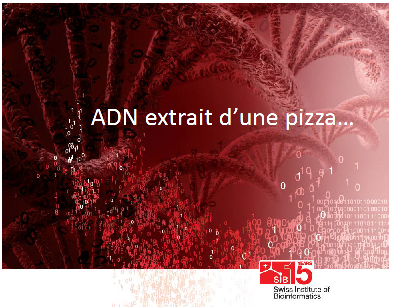

<center><h3><font color="red">Nous baserons notre étude sur un brin d'ADN :

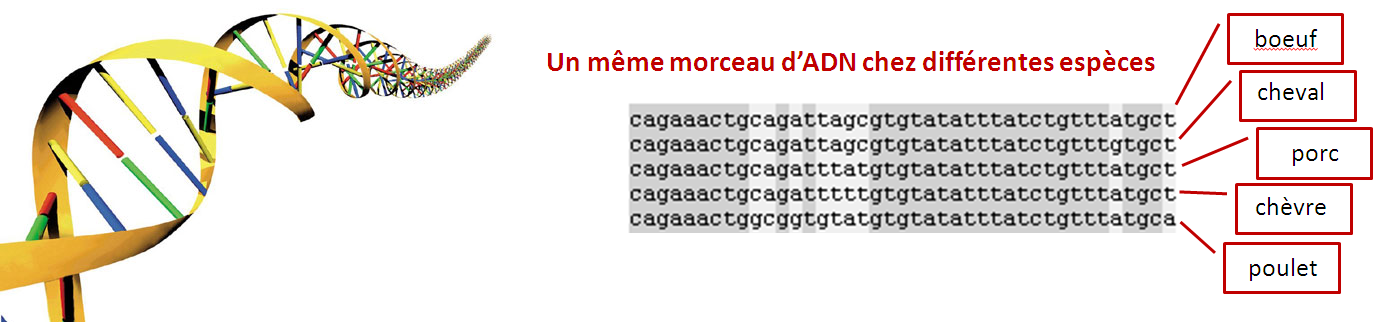

<h3><u>Rappel :</u><p>
L'ADN est composé d'une succession de 4 molécules les 4 nucléotides/bases : <font color="red">Adénine, <font color="blue">Thymine, <font color="green">Guanine <font color="black">et <font color="orange">Cytosine<font color="black"> - liées entre elles dans un ordre bien défini...<p><p>
Les 4 nucléotides/bases sont symbolisés respectivement par les lettres A, T, G et C.<p><p>
L'ADN est "double brin":<br> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color="red">- Le A est toujours en face d'un T,<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Le C toujours en face d'un G,<br><br>
<font color="black">c'est la raison pour laquelle on parle de 'paire de bases'.

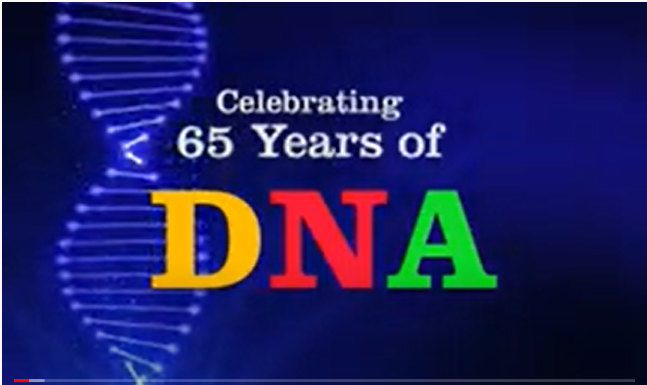

<h1><center><font color="blue">https://www.youtube.com/watch?v=LaiMU48MGm4

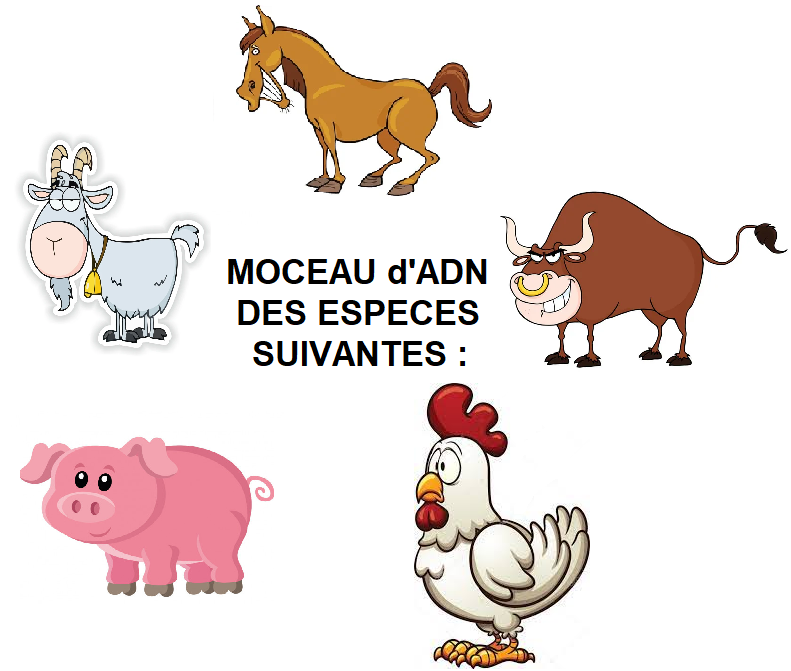

<h3><center> 
<font color='red'>Morceau d'ADN du boeuf  :    cagaaactgcagattagcgtgtatatttatctgtttatgct<br><br>
<font color='navy'>Morceau d'ADN du cheval :    cagaaactgcagattagcgtgtatatttatctgtttgtgct<br><br>
<font color='black'>Morceau d'ADN de la chèvre : cagaaactgcagatttttgtgtatatttatctgtttatgct<br><br>
<font color='purple'>Morceau d'ADN du porc :      cagaaactgcagatttatgtgtatatttatctgtttatgct<br><br>
<font color='blue'>Morceau d'ADN du poulet :    cagaaactggcggtgtatgtgtatatttatctgtttatgca<br><br>    

In [18]:
import string
def derniere_occurrence(motif, alphabet):
    taille_motif = len(motif)
    if ' ' not in alphabet:
        alphabet.append(' ')
    derniere_occ = {lettre: taille_motif for lettre in alphabet}
    
    for i in range(taille_motif - 1):
        derniere_occ[motif[i]] = taille_motif - 1 - i
    
    return derniere_occ
    
#***************************************************
def bmh(tab_saut, texte, motif):
    taille_motif = len(motif)
    taille_texte = len(texte)
        
    i = 0

    while i <= taille_texte - taille_motif:
        j = taille_motif - 1
        while j >=0 and motif[j]==texte[i+j]:
            j = j-1
            
        if j < 0:
            return i

        lettre_suivante = texte[i + taille_motif - 1]
        i += tab_saut[lettre_suivante]
    return -1
    """Fonction bmh()
    Entrée: 
            tab_saut: dictionnaire associant à la clé (lettre de l'alphabet) un décalage de position
            texte: séquence du texte ou doit se faire la recherche
            motif: séquence à rechercher dans le texte
     sortie:d le décalage de position correspondant à l'algorithme Boyer-Moore-Horspool 
    """   
#***************************************************
# Portée principale
liste_alphabet=list(string.ascii_lowercase)
choix = input("Choisir l'ADN a tester : boeuf, poulet, porc, chèvre, cheval")
match choix :
    case "porc" | "Porc":
        motif_rech = "cagaaactgcagatttatgtgtatatttatctgtttatgct"

    case "poulet" | "Poulet":
        motif_rech="cagaaactggcggtgtatgtgtatatttatctgtttatgca"  

    case "cheval" | "Cheval":
        motif_rech = "cagaaactgcagattagcgtgtatatttatctgtttgtgct"

    case "boeuf" | "Boeuf":
        motif_rech = "cagaaactgcagattagcgtgtatatttatctgtttatgct"

    case "chèvre" | "Chèvre" | "chevre" | "chevre":
        motif_rech = "cagaaactgcagatttttgtgtatatttatctgtttatgct"

with open("adn_pizza.txt") as fh:
    texte=fh.read()                               # texte=fh.read() -> texte contient le code adn complet de la pizza à étudier             
texte=texte+' '*len(motif_rech)
dico_saut=derniere_occurrence(motif_rech,liste_alphabet)
position=bmh(dico_saut,texte,motif_rech)
if position>0:
    print(f"L'ADN qui correspond à cet échantillon est bien l'ADN de {choix} à la position : {position}")
else:
    print(f"Ce n'est pas de l'ADN de {choix}, essayez avec autre chose.")


Choisir l'ADN a tester : boeuf, poulet, porc, chèvre, cheval Poulet


L'ADN qui correspond à cet échantillon est bien l'ADN de Poulet à la position : 515


<h3><font color="blue"><u>Question :</u> La pizza qui vous a été servi est :<p>
<font color="red">    1 - Pizza Mexicana (boeuf, poivron, maïs oignon, tabasco, sauce tomate, poivron vert, fromage rapé)<br><br>
<font color="green">    2 - Pizza au chèvre et au miel (fromage de chévre, miel, tomate, créme fraîche, oignon, noisettes) <br><br>
<font color="pink">    3 - Pizza à la Carmine (carmine,mozzaezlla, poitrine de porc fumée, tomate, oignon, huile d'olive, basilic)<br><br>
<font color="navy">    4 - Pizza hippolyte (patate douce, ricotta, soupe de miel, huile d'olive, viande hachée de cheval, fromage)<br><br>
<font color="orange">    5 - Pizza cocozza (émincés de poulet grillé, mozzarella, gruyère râpé, créme fraîche) <br>

Réponse: La pizza cocozza (Au poulet)